# FEATURE SELECTION

In [14]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
pd.set_option("display.max_columns",None)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rf

In [18]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs

In [19]:
df= pd.read_csv("automl.csv",sep=",")

In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,58,0,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,6,No,34,2,2,4,40,3,4,31,1
1,35,0,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,6,Yes,47,4,4,3,1,1,4,1,1
2,37,0,Non-Travel,1077,Human Resources,16,5,Other,3,Female,142,2,3,Manager,2,Single,28591,3,No,22,3,3,2,6,1,1,3,3
3,34,1,Travel_Frequently,1199,Hardware,10,2,Medical,2,Male,197,2,1,Manager,4,Divorced,22968,2,No,2,1,4,1,7,4,3,6,5
4,48,0,Travel_Rarely,184,Human Resources,34,3,Other,3,Male,123,1,3,Human Resources,1,Married,16527,1,Yes,14,2,4,2,17,6,2,11,6


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546221 entries, 0 to 546220
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       546221 non-null  int64 
 1   Attrition                 546221 non-null  int64 
 2   BusinessTravel            546221 non-null  object
 3   DailyRate                 546221 non-null  int64 
 4   Department                546221 non-null  object
 5   DistanceFromHome          546221 non-null  int64 
 6   Education                 546221 non-null  int64 
 7   EducationField            546221 non-null  object
 8   EnvironmentSatisfaction   546221 non-null  int64 
 9   Gender                    546221 non-null  object
 10  HourlyRate                546221 non-null  int64 
 11  JobInvolvement            546221 non-null  int64 
 12  JobLevel                  546221 non-null  int64 
 13  JobRole                   546221 non-null  object
 14  JobS

### USING EVALML

In [9]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [10]:
import evalml
x_train, x_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

In [11]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

### Running the AutoML to select the best algorithm

In [17]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=x_train, y_train=y_train, problem_type='binary',objective="F1",allowed_model_families=["random_forest","catboost","lightgbm"])
automl.search()

{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder + Standard Scaler': '00:42',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder': '00:30',
  'Total time of batch': '01:13'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder + Standard Scaler + RF Classifier Select From Model': '00:32',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder + RF Classifier Select From Model': '00:37',
  'Total time of batch': '01:10'},
 3: {'Decision Tree Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder + Select Columns Transformer + Select Columns Transformer + Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder': '00:15',
  'Light

In [18]:
automl.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,0,Mode Baseline Binary Classification Pipeline,0,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."
1,1,Logistic Regression Classifier w/ Label Encode...,1,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,3,Logistic Regression Classifier w/ Label Encode...,3,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Random Forest Classifier w/ Label Encoder + Re...,4,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,6,LightGBM Classifier w/ Label Encoder + Select ...,6,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'N..."
6,7,Extra Trees Classifier w/ Label Encoder + Sele...,7,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'N..."
7,8,Elastic Net Classifier w/ Label Encoder + Sele...,8,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'N..."
8,9,CatBoost Classifier w/ Label Encoder + Select ...,9,0.666292,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'N..."
9,10,XGBoost Classifier w/ Label Encoder + Select C...,10,0.666249,NaN,NaN,-0.004347,False,"{'Label Encoder': {'positive_label': None}, 'N..."


In [19]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Baseline Classifier': ['Baseline Classifier', 'Label Encoder.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Baseline Classifier':{'strategy': 'mode'}}, custom_name='Mode Baseline Binary Classification Pipeline', random_seed=0)

In [20]:
best_pipeline=automl.best_pipeline

### Let's Check the detailed description

In [21]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


************************************************
* Mode Baseline Binary Classification Pipeline *
************************************************

Problem Type: binary
Model Family: Baseline

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Baseline Classifier
	 * strategy : mode

Training
Training for binary problems.
Objective to optimize binary classification pipeline thresholds for: <evalml.objectives.standard_metrics.F1 object at 0x000002104CDA3C10>
Total training time (including CV): 4.9 seconds

Cross Validation
----------------
               F1 MCC Binary Log Loss Binary  Gini   AUC Precision Balanced Accuracy Binary Accuracy Binary # Training # Validation
0           0.666      0.000          17.284 0.000 0.500     0.500                    0.500           0.500    109,244      327,732
mean        0.666      0.000          17.284 0.000 0.500     0.500                    0.500           0.500          -            -
std             -          -               -    

In [23]:
best_pipeline.score(x_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.5), ('F1', 0.0), ('Precision', 0.0), ('Recall', 0.0)])

### We can also optimize for a problem specific objective

In [25]:
automl_auc = AutoMLSearch(X_train=x_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder + Standard Scaler': '00:33',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + One Hot Encoder': '00:54',
  'Total time of batch': '01:29'}}

In [26]:
automl_auc.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,0,Mode Baseline Binary Classification Pipeline,0,0.500000,NaN,NaN,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."
1,1,Logistic Regression Classifier w/ Label Encode...,1,0.498683,NaN,NaN,-0.131670,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.497461,NaN,NaN,-0.253932,False,"{'Label Encoder': {'positive_label': None}, 'I..."


In [27]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


************************************************
* Mode Baseline Binary Classification Pipeline *
************************************************

Problem Type: binary
Model Family: Baseline

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Baseline Classifier
	 * strategy : mode

Training
Training for binary problems.
Total training time (including CV): 3.8 seconds

Cross Validation
----------------
              AUC    F1 Precision # Training # Validation
0           0.500 0.666     0.500    109,244      327,732
mean        0.500 0.666     0.500          -            -
std             -     -         -          -            -
coef of var     -     -         -          -            -


In [28]:
best_pipeline_auc = automl_auc.best_pipeline

In [29]:
# get the score on holdout data
best_pipeline_auc.score(x_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.5)])

### FEATURE SELECTION

In [22]:
df= pd.read_csv("model1.csv",sep=",")

In [23]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [25]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
250229,0.357143,0.146429,0.632653,0.75,0.000000,0.558824,0.333333,1.00,1.000000,0.490150,0.375,0.877551,1.000000,1.000000,0.333333,0.051282,0.8,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
531881,0.571429,0.095714,0.102041,0.75,0.666667,0.082353,0.000000,0.25,1.000000,0.067741,0.250,0.755102,0.000000,0.666667,0.333333,0.487179,1.0,1.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
425108,0.976190,0.430714,0.591837,1.00,0.000000,0.241176,0.000000,0.75,0.333333,0.109402,0.250,0.959184,1.000000,0.333333,0.333333,0.333333,0.4,0.333333,0.230769,0.205128,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90812,0.380952,0.017857,0.020408,1.00,0.666667,0.758824,0.333333,0.50,0.666667,0.640053,0.625,0.857143,0.333333,0.000000,1.000000,0.000000,1.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
384477,0.595238,0.110000,0.102041,0.25,1.000000,0.823529,0.000000,0.25,1.000000,0.494790,0.500,0.836735,1.000000,0.666667,0.000000,0.435897,0.2,0.000000,0.256410,0.051282,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344414,0.666667,0.760714,1.000000,0.75,0.000000,0.752941,1.000000,0.50,0.666667,0.669993,0.750,0.959184,0.666667,0.666667,1.000000,0.589744,0.0,0.333333,0.512821,0.461538,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
212912,0.833333,0.592143,0.571429,0.50,0.666667,0.464706,0.000000,0.00,0.666667,0.190284,0.250,0.795918,0.333333,1.000000,0.000000,0.256410,0.4,0.000000,0.256410,0.205128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65615,0.714286,0.715000,0.326531,0.25,1.000000,0.629412,0.333333,0.00,0.666667,0.427729,0.625,0.346939,0.333333,0.000000,0.333333,0.128205,0.2,0.333333,0.102564,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
210755,0.833333,0.463571,0.204082,0.25,0.333333,0.041176,0.666667,1.00,0.000000,0.932819,0.250,0.734694,0.333333,1.000000,1.000000,0.897436,1.0,1.000000,0.128205,0.076923,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Random Forest Classifier

In [13]:
model1=rf().fit(x_train,y_train)
p=model1.predict(x_test) 

In [65]:
print("Training Accuracy:",model1.score(x_train,y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y_test,p))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p))
print("------------------------------------------------------------")
print("classification_report:\n",cr(y_test,p))

Training Accuracy: 0.9027406539489583
------------------------------------------------------------
Testing Accuracy: 0.5005446473522815
------------------------------------------------------------
confusion_matrix:
 [[29366 25272]
 [29291 25316]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.50      0.54      0.52     54638
         1.0       0.50      0.46      0.48     54607

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



In [15]:
model1.feature_importances_

array([0.05624986, 0.0717495 , 0.06024883, 0.02791952, 0.02245515,
       0.06732293, 0.02394455, 0.02775897, 0.02378923, 0.07274699,
       0.0378146 , 0.06002578, 0.02371666, 0.02269007, 0.02278248,
       0.05275515, 0.03014007, 0.02379394, 0.0445071 , 0.03587435,
       0.00979416, 0.00939676, 0.00780451, 0.00745481, 0.00777886,
       0.00775176, 0.00791921, 0.00759689, 0.00776757, 0.00745894,
       0.00788025, 0.0075536 , 0.01109828, 0.00614838, 0.00590307,
       0.00551787, 0.00592055, 0.00620256, 0.00606879, 0.0060604 ,
       0.00610474, 0.0059599 , 0.00960462, 0.00991871, 0.0110491 ])

In [16]:
df1=df.drop('Attrition',axis=1)
feature_names = list(df1.columns)

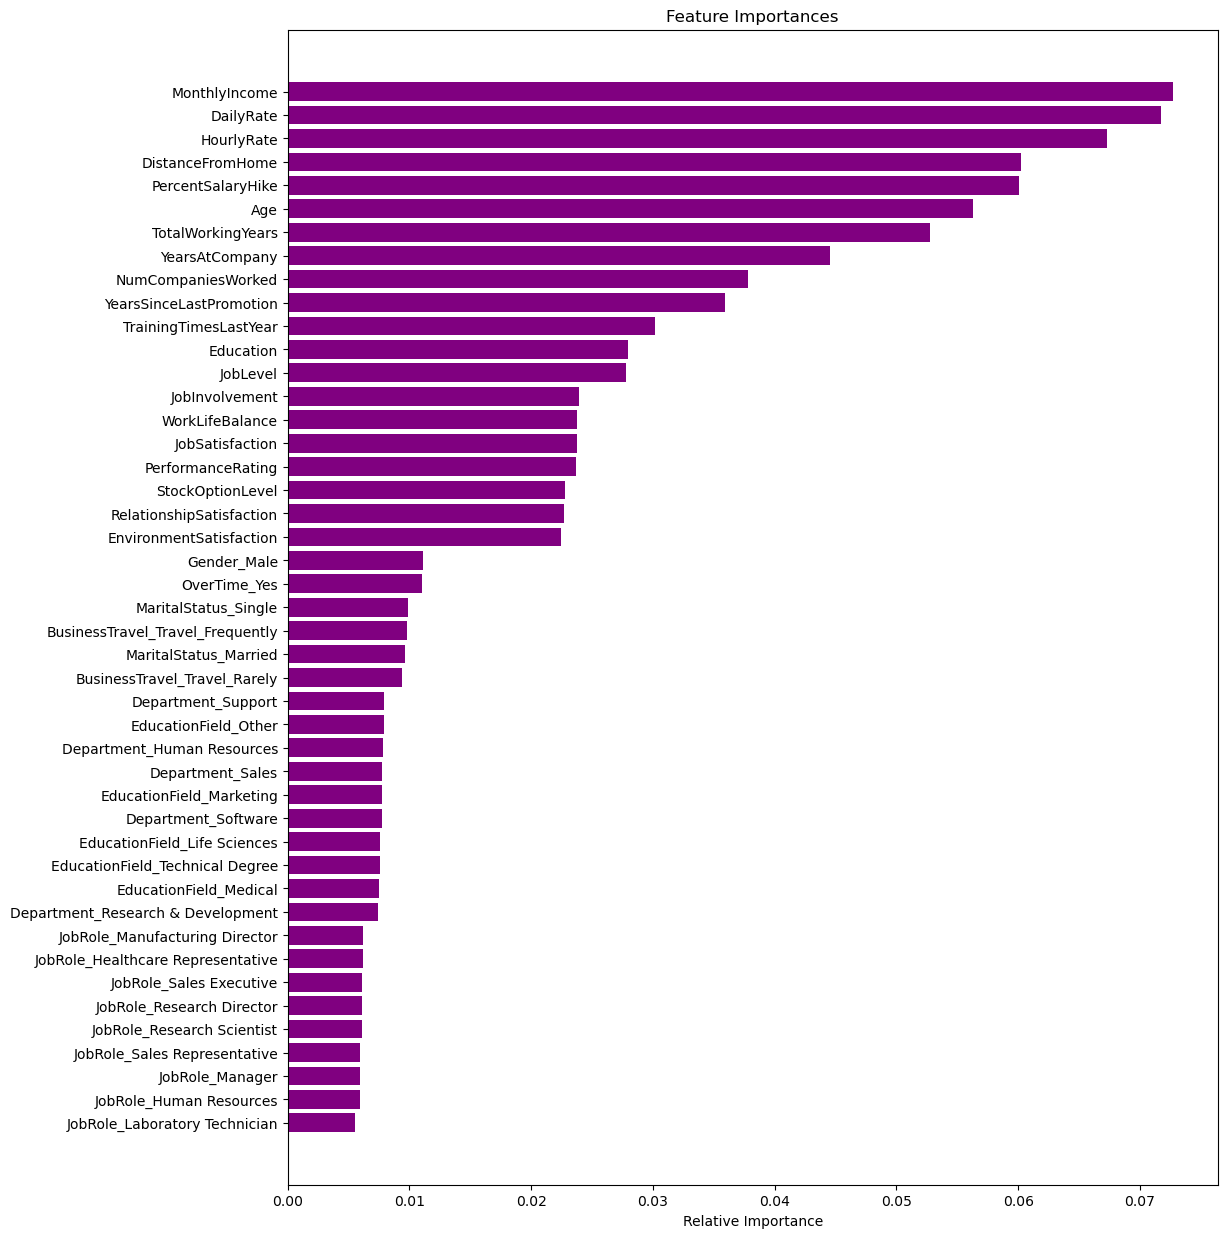

In [17]:
importances = model1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 15))
plt.title("Feature Importances")
plt.barh(range(len(indices)),importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [18]:
col=(['Age','Attrition','DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'])

In [19]:
df2=pd.read_csv('model1.csv',usecols=col)
df2

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.952381,0.0,0.071429,0.244898,1.00,0.000000,0.017647,1.000000,1.00,1.000000,0.325767,0.750,0.693878,0.333333,0.333333,1.000000,1.000000,0.4,1.000000,0.769231,0.000000
1,0.404762,0.0,0.436429,0.551020,0.75,0.666667,0.352941,0.000000,1.00,0.000000,0.800016,0.750,0.959184,1.000000,1.000000,0.666667,0.000000,0.0,1.000000,0.000000,0.000000
2,0.452381,0.0,0.697857,0.306122,1.00,0.666667,0.658824,0.333333,0.50,0.333333,0.551831,0.375,0.448980,0.666667,0.666667,0.333333,0.128205,0.0,0.000000,0.051282,0.051282
3,0.380952,1.0,0.785000,0.183673,0.25,0.333333,0.982353,0.333333,0.00,1.000000,0.439369,0.250,0.040816,0.000000,1.000000,0.000000,0.153846,0.6,0.666667,0.128205,0.102564
4,0.714286,0.0,0.060000,0.673469,0.50,0.666667,0.547059,0.000000,0.50,0.000000,0.310546,0.125,0.285714,0.333333,1.000000,0.333333,0.410256,1.0,0.333333,0.256410,0.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.047619,0.0,0.980000,0.816327,0.50,0.000000,1.000000,0.666667,0.75,1.000000,0.072541,1.000,0.224490,0.000000,0.000000,0.000000,0.025641,0.6,0.333333,0.000000,0.000000
546217,1.000000,1.0,0.850000,0.163265,1.00,0.666667,0.858824,1.000000,0.50,0.000000,0.496470,0.000,0.326531,0.666667,0.000000,0.000000,0.769231,0.4,0.000000,0.410256,0.410256
546218,0.785714,0.0,0.832143,1.000000,0.50,1.000000,0.729412,0.333333,0.50,0.000000,0.223164,0.000,0.040816,0.666667,0.666667,1.000000,0.358974,0.2,0.333333,0.282051,0.000000
546219,0.880952,0.0,0.855714,0.653061,1.00,0.000000,0.658824,0.000000,0.50,0.666667,0.375808,0.625,0.530612,0.666667,1.000000,0.000000,0.717949,0.6,1.000000,0.692308,0.384615


In [20]:
x2=np.array(df2.drop("Attrition",axis=1))
y2=df2['Attrition']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,test_size=0.2)

## Logistic Regression

In [22]:
model2=lg().fit(X_train,Y_train)
p2=model2.predict(X_test)

In [23]:
print("Training Accuracy:",model2.score(X_train,Y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,p2))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,p2))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(Y_test,p2))

Training Accuracy: 0.5020344366738677
------------------------------------------------------------
Testing Accuracy: 0.4992448166964163
------------------------------------------------------------
confusion_matrix:
 [[29596 24984]
 [29721 24944]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.54      0.52     54580
         1.0       0.50      0.46      0.48     54665

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Decision tree

In [24]:
model3=dtc().fit(X_train,Y_train)
p3=model3.predict(X_test)

In [66]:
print("Training Accuracy:",model3.score(X_train,Y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,p3))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,p3))
print("------------------------------------------------------------")
print("classification_report:\n",cr(Y_test,p3))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.49869559247562817
------------------------------------------------------------
confusion_matrix:
 [[27375 27205]
 [27560 27105]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     54580
         1.0       0.50      0.50      0.50     54665

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Random Forest Classifier

In [26]:
model4=rf().fit(X_train,Y_train)
p4=model4.predict(X_test)

In [67]:
print("Training Accuracy:",model4.score(X_train,Y_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,p4))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,p4))
print("------------------------------------------------------------")
print("classification_report:\n",cr(Y_test,p4))

Training Accuracy: 1.0
------------------------------------------------------------
Testing Accuracy: 0.49278227836514255
------------------------------------------------------------
confusion_matrix:
 [[28974 25606]
 [29805 24860]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.49      0.53      0.51     54580
         1.0       0.49      0.45      0.47     54665

    accuracy                           0.49    109245
   macro avg       0.49      0.49      0.49    109245
weighted avg       0.49      0.49      0.49    109245



## Light gbm

In [28]:
%%time

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(X_train, Y_train)
y_pred = lgbm.predict(X_test)

CPU times: total: 41min 22s
Wall time: 17min 1s


In [68]:
print("Training Accuracy:",lgbm.score(X_train,Y_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:",acs(Y_test,y_pred))
print("-------------------------------------------------------------")
print("confusion_matrix:\n",cm(Y_test,y_pred))
print("-------------------------------------------------------------")
print("classifiction_report:\n",cr(Y_test,y_pred))

Training Accuracy: 0.7982909816557431
-------------------------------------------------------------
Testing Accuracy: 0.49886951347887776
-------------------------------------------------------------
confusion_matrix:
 [[27311 27269]
 [27477 27188]]
-------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     54580
         1.0       0.50      0.50      0.50     54665

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Feature Selection Using SelectKbest

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(x,y)

In [35]:
dfscores = pd.DataFrame(fit.scores_) 
dfcolumns = pd.DataFrame(x.columns)

In [36]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [37]:
featureScores.columns = ['Columns','Score'] #naming the dataframe columns
l=featureScores.nlargest(14,'Score')

In [38]:
l

,Columns,Score
27,EducationField_Life Sciences,2.839830
35,JobRole_Laboratory Technician,1.824628
21,BusinessTravel_Travel_Rarely,1.644823
20,BusinessTravel_Travel_Frequently,1.350161
34,JobRole_Human Resources,1.241292
29,EducationField_Medical,1.226695
36,JobRole_Manager,0.873949
38,JobRole_Research Director,0.829540
4,EnvironmentSatisfaction,0.760419
41,JobRole_Sales Representative,0.726482


In [39]:
col1=(['Attrition','EducationField_Life Sciences','JobRole_Laboratory Technician','BusinessTravel_Travel_Rarely',
'BusinessTravel_Travel_Frequently','JobRole_Human Resources','EducationField_Medical','JobRole_Manager','JobRole_Research Director',
'EnvironmentSatisfaction','JobRole_Sales Representative','RelationshipSatisfaction','Department_Support','EducationField_Technical Degree',
 'Department_Research & Development'])

In [40]:
df3=pd.read_csv("model1.csv",usecols=col1)

In [41]:
df3

,Attrition,EnvironmentSatisfaction,RelationshipSatisfaction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Support,EducationField_Life Sciences,EducationField_Medical,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Research Director,JobRole_Sales Representative
0,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.666667,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.666667,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546217,1.0,0.666667,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
546218,0.0,1.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546219,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x1=df3.drop("Attrition",axis=1)
y1=df3["Attrition"]

In [40]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

In [41]:
len(y1_train[y1_train==1])

218634

In [42]:
len(y1_train[y1_train==0])

218342

## Logistic Regression

In [43]:
logis=lg().fit(x1_train,y1_train)
p5=logis.predict(x1_test)

In [69]:
print("Training Accuracy:",logis.score(x1_train,y1_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,p5))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,p5))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y1_test,p5))

Training Accuracy: 0.5022266669107686
------------------------------------------------------------
Testing Accuracy: 0.5035470730925901
------------------------------------------------------------
confusion_matrix:
 [[25075 29772]
 [24463 29935]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.51      0.46      0.48     54847
         1.0       0.50      0.55      0.52     54398

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Decision tree

In [45]:
tree=dtc().fit(x1_train,y1_train)
p6=tree.predict(x1_test)

In [70]:
print("Training Accuracy:",tree.score(x1_train,y1_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,p6))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,p6))
print("------------------------------------------------------------")
print("classification_report:\n",cr(y1_test,p6))

Training Accuracy: 0.5293837647834206
------------------------------------------------------------
Testing Accuracy: 0.49814636825484004
------------------------------------------------------------
confusion_matrix:
 [[28786 26061]
 [28764 25634]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51     54847
         1.0       0.50      0.47      0.48     54398

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Random Forest Classifier

In [47]:
forest=rf().fit(x1_train,y1_train)
p7=forest.predict(x1_test)

In [71]:
print("Training Accuracy:",forest.score(x1_train,y1_train))
print("------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,p7))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,p7))
print("------------------------------------------------------------")
print("classification_report:\n",cr(y1_test,p7))

Training Accuracy: 0.5292670535681594
------------------------------------------------------------
Testing Accuracy: 0.49845759531328665
------------------------------------------------------------
confusion_matrix:
 [[28101 26746]
 [28045 26353]]
------------------------------------------------------------
classification_report:
               precision    recall  f1-score   support

         0.0       0.50      0.51      0.51     54847
         1.0       0.50      0.48      0.49     54398

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



## Light gbm

In [49]:
%%time

from lightgbm import LGBMClassifier

lgbm2 = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm2.fit(x1_train, y1_train)
y_pred1 = lgbm2.predict(x1_test)

CPU times: total: 5min 3s
Wall time: 2min 10s


In [72]:
print("Training Accuracy:",lgbm2.score(x1_train,y1_train))
print("-------------------------------------------------------------")
print("Testing Accuracy:",acs(y1_test,y_pred1))
print("-------------------------------------------------------------")
print("confusion_matrix:\n",cm(y1_test,y_pred1))
print("-------------------------------------------------------------")
print("classifiction_report:\n",cr(y1_test,y_pred1))

Training Accuracy: 0.5145339789828274
-------------------------------------------------------------
Testing Accuracy: 0.5002791889789007
-------------------------------------------------------------
confusion_matrix:
 [[26448 28399]
 [26193 28205]]
-------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

         0.0       0.50      0.48      0.49     54847
         1.0       0.50      0.52      0.51     54398

    accuracy                           0.50    109245
   macro avg       0.50      0.50      0.50    109245
weighted avg       0.50      0.50      0.50    109245



comment: After performing feature selection most of the models encountered with the lower accuracy of 50% , so we decided to keep all the features for model building.